<a href="https://colab.research.google.com/github/kakods/Digit-Recognizer-Kaggle-/blob/master/Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"kakods","key":"064cb0b6e127c15c51fa2a6b6f78807b"}'}

In [0]:
!pip install -U -q kaggle

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle competitions download -c digit-recognizer

train.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
!pip install http://download.pytorch.org/whl/cu80/torch-0.3.1-cp36-cp36m-linux_x86_64.whl  && pip install torchvision
!pip install Pillow==4.0.0
!pip install PIL
!pip install image
!pip install git+https://github.com/fastai/fastai@2e1ccb58121dc648751e2109fc0fbf6925aa8887
!apt update && apt install -y libsm6 libxext6
!{sys.executable} -m pip install torchtext==0.2.3
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import torch
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from matplotlib import patches, patheffects
from fastai.plots import *

from fastai.torch_imports import *

  Using cached https://files.pythonhosted.org/packages/62/94/5430ebaa83f91cc7a9f687ff5238e26164a779cca2ef9903232268b0a318/Pillow-5.3.0-cp36-cp36m-manylinux1_x86_64.whl
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0
  Using cached https://files.pythonhosted.org/packages/37/e8/b3fbf87b0188d22246678f8cd61e23e31caa1769ebc06f1664e2e5fe8a17/Pillow-4.0.0-cp36-cp36m-manylinux1_x86_64.whl
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
  Found existing installation: Pillow 5.3.0
    Uninstalling Pillow-5.3.0:
      Successfully uninstalled Pillow-5.3.0
  Could not find a version that satisfies the requirement PIL (from versions: )
No matching distribution found for PIL
  Cloning https://github.com/fastai/fastai (to revision 2e1ccb58121dc648751e2109fc0fbf6925aa8887) to /tmp/pip-req-build-c_kfca3n
  Running setup.py bdist_wheel for fastai ... - \ done
  Stored in direct

In [0]:
from sklearn.model_selection import train_test_split

In [10]:
!pip install http://download.pytorch.org/whl/cu80/torch-0.3.1-cp36-cp36m-linux_x86_64.whl  && pip install torchvision

!pip install Pillow==4.0.0
!pip install PIL
!pip install image
!pip install git+https://github.com/fastai/fastai@2e1ccb58121dc648751e2109fc0fbf6925aa8887
!apt update && apt install -y libsm6 libxext6
%reload_ext autoreload
%autoreload 2
%matplotlib inline
!{sys.executable} -m pip install torchtext==0.2.3
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from matplotlib import patches, patheffects
from fastai.plots import *

  Using cached https://files.pythonhosted.org/packages/62/94/5430ebaa83f91cc7a9f687ff5238e26164a779cca2ef9903232268b0a318/Pillow-5.3.0-cp36-cp36m-manylinux1_x86_64.whl
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0
  Using cached https://files.pythonhosted.org/packages/37/e8/b3fbf87b0188d22246678f8cd61e23e31caa1769ebc06f1664e2e5fe8a17/Pillow-4.0.0-cp36-cp36m-manylinux1_x86_64.whl
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
  Found existing installation: Pillow 5.3.0
    Uninstalling Pillow-5.3.0:
      Successfully uninstalled Pillow-5.3.0
  Could not find a version that satisfies the requirement PIL (from versions: )
No matching distribution found for PIL
  Cloning https://github.com/fastai/fastai (to revision 2e1ccb58121dc648751e2109fc0fbf6925aa8887) to /tmp/pip-req-build-i7ufjeei
  Running setup.py bdist_wheel for fastai ... - \ done
  Stored in direct

In [19]:
cd content

/content


In [12]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [0]:
!cp test.csv train.csv data

In [0]:
Path='data'
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [21]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
train_label=train['label']

In [24]:
train_label

0        1
1        0
2        1
3        4
4        0
5        0
6        7
7        3
8        5
9        3
10       8
11       9
12       1
13       3
14       3
15       1
16       2
17       0
18       7
19       5
20       8
21       6
22       2
23       0
24       2
25       3
26       6
27       9
28       9
29       7
        ..
41970    2
41971    3
41972    4
41973    4
41974    3
41975    9
41976    2
41977    4
41978    4
41979    4
41980    7
41981    2
41982    8
41983    7
41984    3
41985    3
41986    0
41987    5
41988    0
41989    5
41990    3
41991    1
41992    9
41993    6
41994    4
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [0]:
train=train.drop('label',axis=1)

In [0]:
train_image=train

In [27]:
train_image.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
train_image=train_image.values.reshape(-1,28,28)

In [0]:
train_image=np.stack((train_image,)*3,axis=-1).astype('float32')

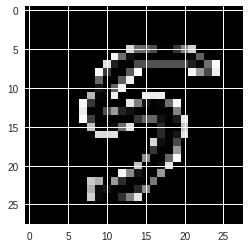

In [30]:
plt.imshow(train_image[8])

In [0]:
test=test.values.reshape(-1,28,28)

In [0]:
test=np.stack((test,)*3,axis=-1).astype('float32')

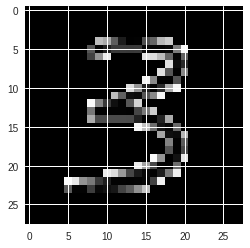

In [33]:
plt.imshow(test[9])

In [0]:
?ImageClassifierData.from_arrays

In [0]:
?train_test_split

In [36]:
train_img, val_img, train_lbl, val_lbl=train_test_split(train_image, train_label.values, train_size=0.8,random_state=1)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [0]:
sz=28

In [0]:
arch=resnet34

In [0]:
classes=np.unique(train_lbl)

In [0]:
data=ImageClassifierData.from_arrays(Path,trn=(train_img/255,train_lbl),val=(val_img/255,val_lbl),tfms=tfms_from_model(arch,sz,aug_tfms=transforms_side_on,max_zoom=1.1),classes=classes,test=test/255)

In [0]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [51]:
lrf=learn.lr_find()

 83%|████████▎ | 438/525 [00:08<00:01, 48.28it/s, loss=2.3] 


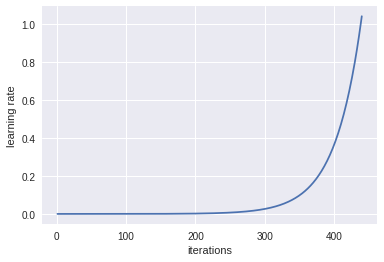

In [52]:
learn.sched.plot_lr()

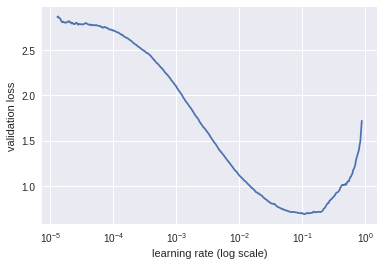

In [53]:
learn.sched.plot()

In [54]:
learn.fit(0.01,2)

epoch      trn_loss   val_loss   accuracy   
    0      0.346127   0.209523   0.933214  
    1      0.292582   0.187257   0.939524  



[array([0.18726]), 0.9395238095238095]

In [0]:
learn.precompute=False

In [56]:
learn.fit(0.01,3,cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      0.453934   0.269148   0.910952  
    1      0.429006   0.259539   0.915833  
    2      0.397505   0.25405    0.917262  



[array([0.25405]), 0.9172619047619047]

In [0]:
learn.unfreeze()

In [0]:
lr=np.array([1e-4,1e-3,1e-2])

In [60]:
learn.fit(lr, 4, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.083294   0.051311   0.984881  
    1      0.072128   0.053752   0.984048  
    2      0.059942   0.04767    0.98631   
    3      0.074021   0.046188   0.987619  
    4      0.055186   0.041236   0.98869   
    5      0.055941   0.042204   0.988333  
    6      0.040082   0.041028   0.98881   
    7      0.046697   0.044857   0.986071  
    8      0.04983    0.041812   0.986429  
    9      0.047419   0.041796   0.987024  
    10     0.041767   0.039889   0.988452  
    11     0.037929   0.038095   0.98869   
    12     0.024425   0.036978   0.98881   
    13     0.031939   0.035597   0.98881   
    14     0.026799   0.034498   0.990238  



[array([0.0345]), 0.9902380952380953]

In [62]:
%time log_preds_test, y_test=learn.TTA(is_test=True)
probs_test=np.mean(np.exp(log_preds_test),0)
probs_test.shape

CPU times: user 1min 49s, sys: 39.5 s, total: 2min 29s
Wall time: 1min 46s


(28000, 10)

In [63]:
probs_test

array([[0.     , 0.     , 0.99998, ..., 0.     , 0.     , 0.     ],
       [0.99983, 0.     , 0.00001, ..., 0.00002, 0.     , 0.00001],
       [0.00001, 0.     , 0.00009, ..., 0.00042, 0.0008 , 0.99805],
       ...,
       [0.     , 0.     , 0.     , ..., 0.     , 0.00003, 0.     ],
       [0.00002, 0.     , 0.00001, ..., 0.00042, 0.00001, 0.99928],
       [0.     , 0.     , 0.99992, ..., 0.     , 0.00005, 0.     ]], dtype=float32)

In [64]:
probs_test.shape

(28000, 10)

In [0]:
df=pd.DataFrame(probs_test)

In [67]:
df.head()

,0,1,2,3,4,5,6,7,8,9
0,2.599094e-08,1.672109e-08,0.999982,0.000007,1.539900e-07,0.000003,0.000003,5.365717e-07,0.000004,4.046450e-07
1,9.998299e-01,2.597124e-06,0.000011,0.000003,1.251938e-06,0.000118,0.000006,1.953413e-05,0.000003,5.202178e-06
2,7.966950e-06,1.630252e-06,0.000086,0.000411,9.891742e-05,0.000112,0.000013,4.219365e-04,0.000803,9.980456e-01
3,9.881096e-01,1.158007e-06,0.000012,0.000002,2.611042e-05,0.000015,0.000003,1.214317e-05,0.000009,1.181056e-02
4,2.147622e-07,1.373180e-06,0.000034,0.998106,7.773614e-07,0.000004,0.000017,4.445841e-06,0.001802,3.002386e-05


In [0]:
df=df.assign(Label=df.values.argmax(axis=1))
df=df.assign(ImageId=df.index.values+1)

In [0]:
df1=df[['ImageId', 'Label']]

In [70]:
df1.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [0]:
df1.to_csv("submission.csv", index=False)

In [72]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a file.
uploaded = drive.CreateFile({'title': 'submission.csv'})
uploaded.SetContentFile('submission.csv')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1J4HSIgvdfwCWYdsFI6r7WzABAhIk3-sZ
